In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [2]:
# importing dataset
data = pd.read_csv('Aren - Aren (1).csv', parse_dates=['Month'], delimiter=",", index_col="Month")
data2 = pd.read_csv('choco - choco (4).csv', parse_dates=['Month'], delimiter=",", index_col="Month")
data3 = pd.read_csv('taro.csv', parse_dates=['Month'], delimiter=",", index_col="Month")
data4 = pd.read_csv('Redvelvet.csv', parse_dates=['Month'], delimiter=",", index_col="Month")
data5 = pd.read_csv('Avocado - Avocado (1).csv', parse_dates=['Month'], delimiter=",", index_col="Month")
data.head()


,Monthly Kopi Susu Gula Aren Prediction
Month,
2021-01-05,23
2021-01-06,63
2021-01-07,35
2021-01-08,27
2021-01-09,42


In [3]:
data2.head()

,Monthly Choco
Month,
2021-01-05,22
2021-01-06,61
2021-01-07,30
2021-01-08,25
2021-01-09,40


In [4]:
data3.head()

,Monthly Taro Prediction
Month,
2021-01-05,23
2021-01-06,66
2021-01-07,29
2021-01-08,23
2021-01-09,34


In [5]:
data4.head()

,Monthly Red Velvet Prediction
Month,
2021-01-05,17
2021-01-06,58
2021-01-07,25
2021-01-08,20
2021-01-09,31


In [6]:
data5.head()

,Monthly Avocado Prediction
Month,
2021-01-05,15
2021-01-06,45
2021-01-07,22
2021-01-08,15
2021-01-09,26


In [7]:
data

,Monthly Kopi Susu Gula Aren Prediction
Month,
2021-01-05,23
2021-01-06,63
2021-01-07,35
2021-01-08,27
2021-01-09,42
2021-01-10,81
2021-01-11,90
2021-01-12,79
2022-01-01,83


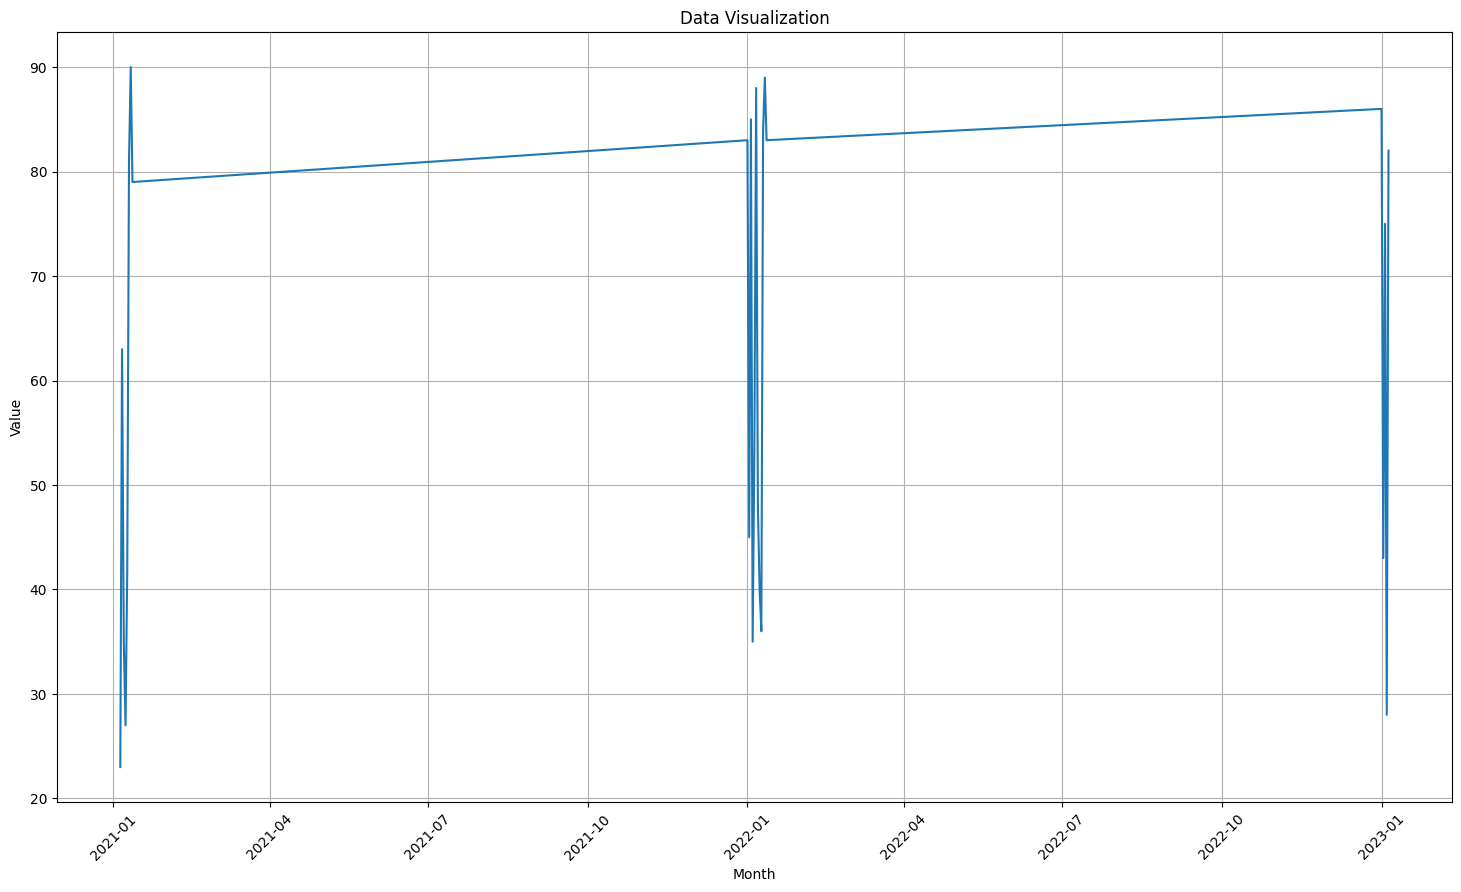

In [8]:
  plt.figure(figsize=(18, 10))
  plt.plot(data.index, data["Monthly Kopi Susu Gula Aren Prediction"], linestyle="-")
  plt.title('Data Visualization')
  plt.xlabel('Month')
  plt.ylabel('Value')
  plt.xticks(rotation=45)
  plt.grid(True)
  plt.show()

In [9]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm

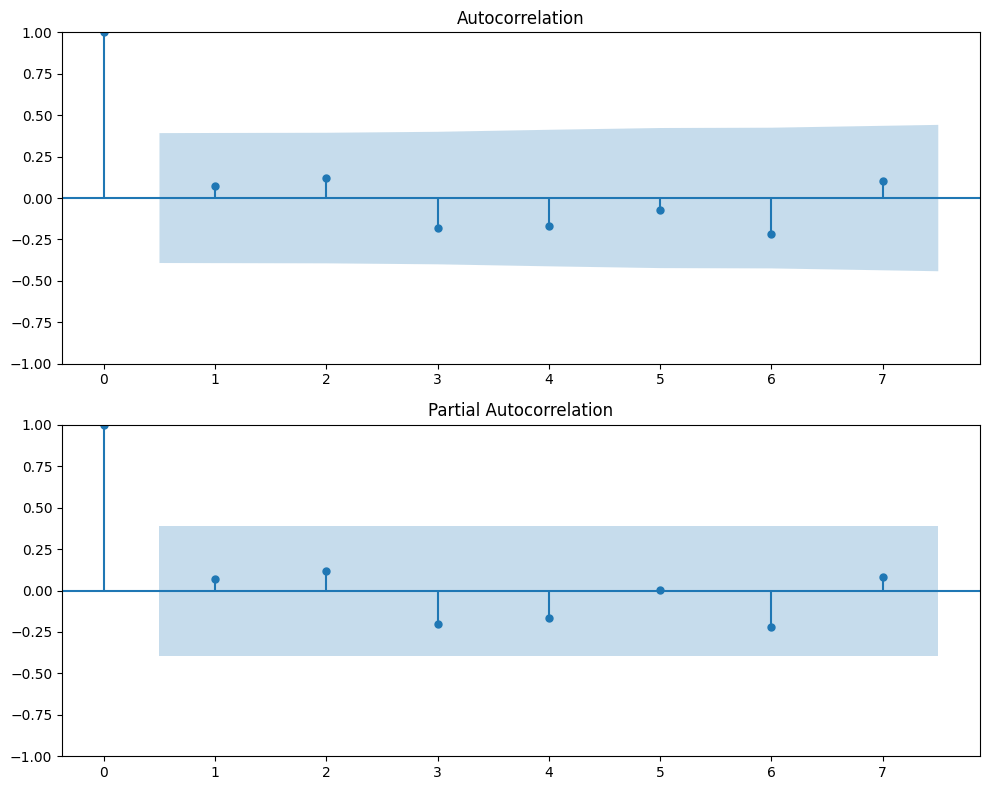

In [10]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
sm.graphics.tsa.plot_acf(data, lags=7, ax=ax[0])
sm.graphics.tsa.plot_pacf(data, lags=7, ax=ax[1])
plt.tight_layout()
plt.show()

In [11]:
train_data = data.loc['01/05/2021':'01/01/2023']
test_data = data.loc['01/02/2023':]

In [12]:
train_data

,Monthly Kopi Susu Gula Aren Prediction
Month,
2021-01-05,23
2021-01-06,63
2021-01-07,35
2021-01-08,27
2021-01-09,42
2021-01-10,81
2021-01-11,90
2021-01-12,79
2022-01-01,83


In [13]:
test_data

,Monthly Kopi Susu Gula Aren Prediction
Month,
2023-01-02,43
2023-01-03,75
2023-01-04,28
2023-01-05,82


In [14]:
#pembutan fungsi untuk stationary test
from statsmodels.tsa.stattools import adfuller
def test_adf(series, title=''):
    dfout={}
    dftest=sm.tsa.adfuller(series.dropna(), autolag='AIC', regression='ct')
    for key,val in dftest[4].items():
        dfout[f'critical value ({key})']=val
    if dftest[1]<=0.05:
        print("Strong evidence against Null Hypothesis")
        print("Reject Null Hypothesis - Data is Stationary")
        print("Data is Stationary", title)
    else:
        print("Strong evidence for Null Hypothesis")
        print("Accept Null Hypothesis - Data is not Stationary")
        print("Data is NOT Stationary for", title)

In [15]:
#stationary test
test_adf(data['Monthly Kopi Susu Gula Aren Prediction'], 'Monthly Kopi Susu Gula Aren Prediction')

Strong evidence against Null Hypothesis
Reject Null Hypothesis - Data is Stationary
Data is Stationary Monthly Kopi Susu Gula Aren Prediction


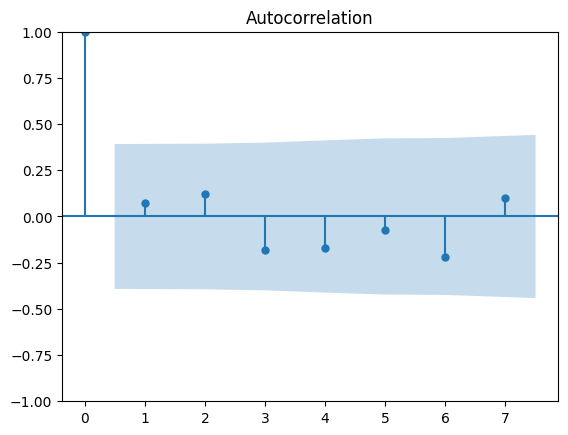

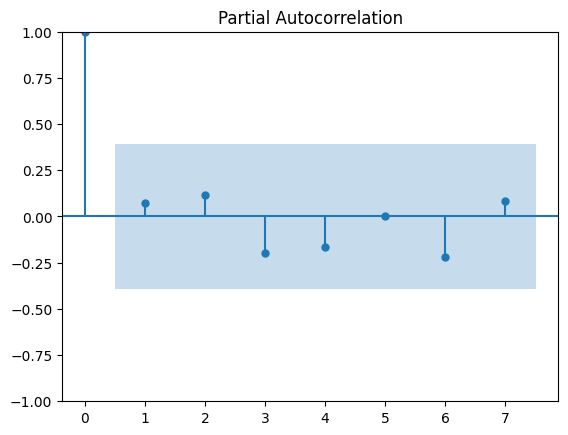

In [16]:

acf_plot = plot_acf(data, lags=7)
pacf_plot = plot_pacf(data, lags=7)

In [17]:
result = adfuller(data['Monthly Kopi Susu Gula Aren Prediction'])

In [18]:
test_statistic = result[0]
p_value = result[1]
print("ADF Test Statistic:", test_statistic)
print("p-value:", p_value)

ADF Test Statistic: -4.526938022606159
p-value: 0.00017573742471421356


In [19]:
if p_value < 0.05:
    print("Data is stationary (reject the null hypothesis)")
else:
    print("Data is non-stationary (fail to reject the null hypothesis)")

Data is stationary (reject the null hypothesis)


In [20]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [21]:
lag_acf = acf(data, nlags=7)
lag_pacf = pacf(data, nlags=7, method='ols')

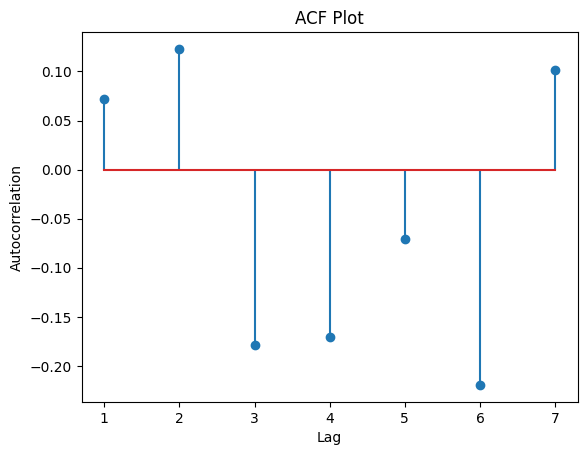

In [22]:
plt.stem(range(1, len(lag_acf)), lag_acf[1:])
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('ACF Plot')
plt.show()


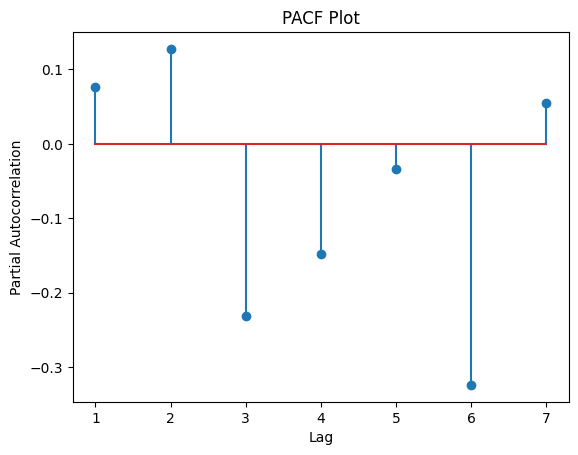

In [23]:
plt.stem(range(1, len(lag_pacf)), lag_pacf[1:])
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('PACF Plot')
plt.show()

In [24]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: C:\Users\HP\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [25]:
import warnings
warnings.filterwarnings("ignore")

In [26]:
# Identify the appropriate order of differencing (d) and parameters (p, q)
d = 0  # order of differencing
p = 0  # AR order
q = 0  # MA order

In [27]:
best_aic = float("inf")
best_model = None

for d_val in range(0, 2):
    for p_val in range(0, 3):
        for q_val in range(0, 3):
            try:
                model = sm.tsa.ARIMA(data, order=(p_val, d_val, q_val))
                results = model.fit()
                if results.aic < best_aic:
                    best_aic = results.aic
                    best_model = model
                    d = d_val
                    p = p_val
                    q = q_val
            except:
                continue

In [28]:
import statsmodels.api as sm


In [29]:
final_model = sm.tsa.ARIMA(data, order=(p, d, q))
final_results = final_model.fit()


In [30]:
print("Best Model:")
print(f"Order: ({p}, {d}, {q})")
print("AIC:", best_aic)

Best Model:
Order: (0, 1, 1)
AIC: 227.58983107609419


In [31]:
##model = sm.tsa.ARIMA(train_data, order=(p, d, q))
#results = model.fit()


In [32]:
from pmdarima.arima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [33]:
p = 5
d = 0
q = 4

In [34]:
model = ARIMA(train_data, order=(p, d, q))
model_fit = model.fit()

In [35]:
print(model_fit)

In [36]:
start_index = len(train_data)
end_index = len(train_data) + len(test_data) + 16

In [37]:
arima_best = model_fit.predict(start=start_index, end=end_index)


In [38]:
print("Hasil Prediksi:")
print(arima_best)

Hasil Prediksi:
21    54.488514
22    44.789332
23    41.277099
24    41.887819
25    55.992066
26    65.838485
27    77.957384
28    81.021384
29    78.436926
30    70.205127
31    59.730922
32    51.807165
33    48.096849
34    50.463815
35    56.905042
36    65.096405
37    71.765659
38    74.631881
39    73.041995
40    67.867771
41    61.371757
Name: predicted_mean, dtype: float64


In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(train_data, arima_best)
rmse = mean_squared_error(train_data, arima_best, squared=False)
mae = mean_absolute_error(train_data, arima_best)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 397.43664995988286
Root Mean Squared Error (RMSE): 19.935813250526873
Mean Absolute Error (MAE): 17.343769677186977


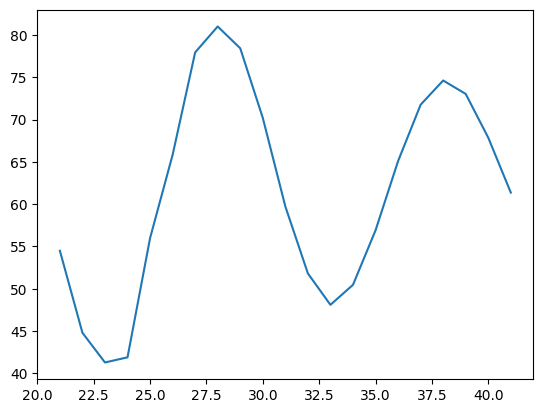

In [40]:
plt.plot(arima_best.index, arima_best, label='Hasil Prediksi')


In [41]:
predictions = arima_best[:len(test_data)]

In [42]:
predictions

21    54.488514
22    44.789332
23    41.277099
24    41.887819
Name: predicted_mean, dtype: float64

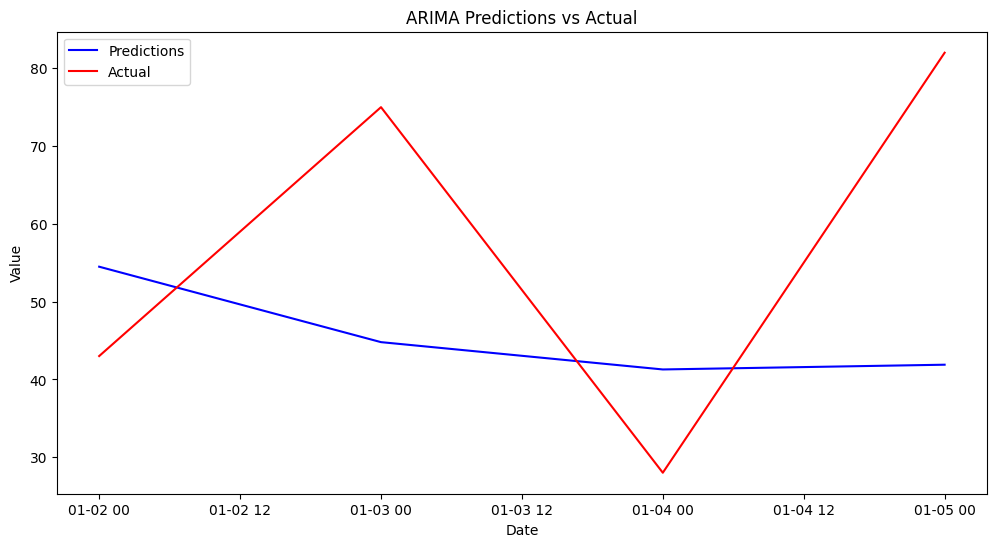

In [43]:
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, predictions, color='blue', label='Predictions')
plt.plot(test_data.index, test_data, color='red', label='Actual')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('ARIMA Predictions vs Actual')
plt.legend()
plt.show()